---
title: "Uniform Theory of Diffraction: how to compute the transition function"
categories:
  - Research
excerpt_separator: "<!--more-->"
tags:
  - diffraction
  - programming
  - python
---

In the Uniform Theory of Diffraction (UTD), diffraction coefficients require evaluating a transition function, \\(F(x)\\), who has no closed form. However, we will see that its evaluation can be done quite easily with modern scientific libraries.

<!--more-->

# Context

In 1990, McNamara et al. published *Introduction to the Uniform Geometrical Theory of Diffraction* in which they describe with details how to apply the UTD and how to compute its coefficients. I will not go into details here, but one of the pillars of the UTD is the use of a so-called *transition function*, whose expression is given by
$$ F(x) = 2j \sqrt{x} e^{j x} \int\limits_\sqrt{x}^\infty e^{-j u^2} \text{d}u,$$
with \\(j^2 = -1\\) (see Page 184).

On the same page, the authors propose approximations for $F(x)$ for \\(x \le 0.3 \\) and \\(x \ge 5.5 \\), saying we could interpolate when \\(0.3 \lt x \lt 5.5 \\).

However, with modern scientific libraries, we should be able to avoid these approximations and take a more generic approach.

## Link to Fresnel integral

As mentioned in the book, the integral part in the transition function resembles a Fresnel integral
$$\int\limits_0^\infty e^{-j u^2} \text{d}u = \sqrt{\frac{\pi}{2}} \frac{1 - j}{2}.$$

Then, \\(F(x)\\) can be rewritten as
$$ F(x) = 2j \sqrt{x} e^{j x} \Big( \underbrace{\int\limits_0^\infty e^{-j u^2} \text{d}u}_{\sqrt{\frac{\pi}{2}} \frac{1 - j}{2}} - \int\limits_0^\sqrt{x} e^{-j u^2} \text{d}u\Big).$$

Finally, using [Euler's formula](https://en.wikipedia.org/wiki/Euler%27s_formula), we can further expand
$$\int\limits_0^\sqrt{x} e^{-j u^2} \text{d}u = \int\limits_0^\sqrt{x} \cos(u^2) -j\sin(u^2) \text{d}u = \underbrace{\int\limits_0^\sqrt{x} \cos(u^2)\text{d}u}_{C(\sqrt{x})} - j \underbrace{\int\limits_0^\sqrt{x} \sin(u^2)\text{d}u}_{S(\sqrt{x})},$$

where \\(C(x)\\) and \\(S(x)\\) are also [Fresnel integrals](https://dlmf.nist.gov/7.2#iii), available in many (free) scientific libraries, such as in [`scipy.special.fresnel`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.fresnel.html). If one cannot find an implementation of those functions, it is worth mentioning that \\(C(x)\\) and \\(S(x)\\) can be expressed using the [error function](https://en.wikipedia.org/wiki/Fresnel_integral#Properties), which is very likely to be freely available in most programming languages.

## Transition function via Fresnel integrals

As a summary, \\(F(x)\\) can be rewritten as
$$ 2j \sqrt{x} e^{j x} \Big( \sqrt{\frac{\pi}{2}} \frac{1 - j}{2} - C(x) + j S(x)\Big).$$

# Implementation

Here, I will detail how one can implement the transition function in a few lines with Python, using the very popular open source packages [NumPy](numpy.org) and [SciPy](scipy.org).

The advantage of using those libraries is that they allow for both scalar and vector inputs, and handle both real and complex numbers.

Finally, the plotting will be performed by [matplotlib](https://matplotlib.org/), another very popular open source package.

**Note:** SciPy defines \\(C(x)\\) and \\(S(x)\\) integrals using \\(\frac{\pi}{2}u^2\\) instead of \\(u^2\\). As such, the result of the integrals must be multiplied by some **factor** (\\(\sqrt{\frac{\pi}{2}}\\)) and the argument of \\(C(x)\\) and \\(S(x)\\) must be divided by this factor.

In [1]:
# Package imports

import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt

In [2]:
# Transition function


def F(x):
    
    factor = np.sqrt(np.pi / 2)
    sqrtx = np.sqrt(x)

    S, C = sc.fresnel(sqrtx / factor)

    return (
        2j
        * sqrtx
        * np.exp(1j * x)
        * (factor * ((1 - 1j) / 2 - C + 1j * S))
        # We changed the parenthesis so that \sqrt{pi/2} now multiplies C and S
    )

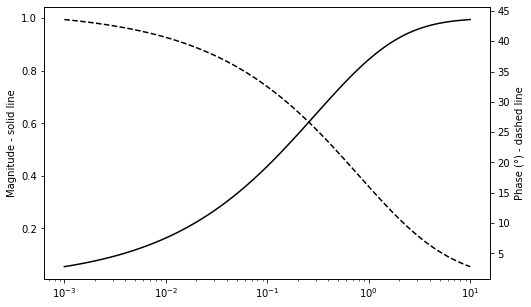

In [3]:
# Plotting

x = np.logspace(-3, 1, 100)
y = F(x)

A = np.abs(y)  # Amplitude of F(x)
P = np.angle(y, deg=True)  # Phase (in deg.) of F(x)

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.semilogx(x, A, "k-")
ax1.set_ylabel("Magnitude - solid line")
ax2 = plt.twinx()
ax2.semilogx(x, P, "k--")
ax2.set_ylabel("Phase (°) - dashed line");

As a verification, we obtain the same results as in the reference book (Figure 4.16, Page 185).

# References

<div class="csl-bib-body">
  <div data-csl-entry-id="mcnamara1990introduction" class="csl-entry">McNamara, D. A., Pistorius, C. W. I., &#38; Malherbe, J. A. G. (1990). <i>Introduction to the Uniform Geometrical Theory of Diffraction</i>. Artech House. https://www.academia.edu/27926436/Theory_of_Diffraction_INTRODUCTION_TO_The_Uniform_Geometrical</div>
</div>